# Lecture 3 - Linear Problem

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits, make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Classification: Image number problem

**Objective:**
to compare different approachs to a image classification problem: (1) considering every pixel as a variable and (2) reducing the dimensionality by aggregating the information in two features. 

In [2]:
data = load_digits()
data['data'].shape

(1797, 64)

In [3]:
data['target'][0], data['images'][0]

(0,
 array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]))

<AxesSubplot:>

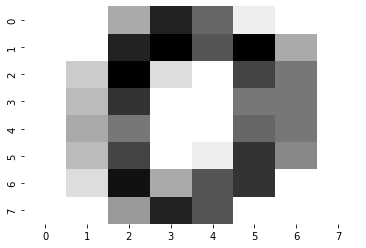

In [4]:
sns.heatmap(data['images'][0], cbar=False, cmap='gray_r')

### Approach 1: every pixel is a variable

Applying the approach of considering every pixel as a variable, and applying a classification algorith. To simplify things, let's compare only two numbers: 1 e 5

dataset size: 182


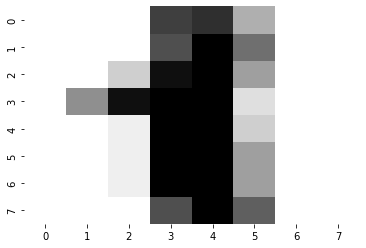

dataset size: 182


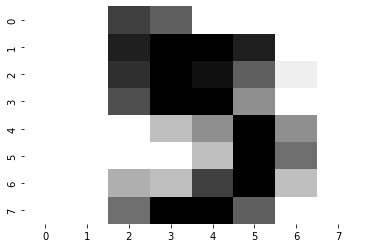

In [5]:
# Selecting the sample from dataset.

def filtering_data(whole_data, number):
    ''' Return only the specified number data from the original dataset. '''
    index = whole_data['target'] == number
    filtered_data = whole_data['data'][index]
    figure_data = whole_data['images'][index]
    
    # Checking the result
    print(f"dataset size: {len(filtered_data)}")
    sns.heatmap(figure_data[0], cbar=False, cmap='gray_r')
    plt.show()

    return filtered_data, figure_data


data1, image1 = filtering_data(data, 1)
data5, image5 = filtering_data(data, 5)

In [6]:
# Processing the sample before training the model.

df_number1 = pd.DataFrame(data1)
df_number1['target'] = 1

df_number5 = pd.DataFrame(data5)
df_number5['target'] = 5

df = pd.concat([df_number1, df_number5], axis=0, ignore_index=True)
X = df.loc[:, 0:63]
y = df['target']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(364, 64) (364,)
(291, 64) (73, 64) (291,) (73,)


In [7]:
# Predicting and measuring the accuracy.
model = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
[[37  0]
 [ 0 36]]


Predicted number: 5


<AxesSubplot:>

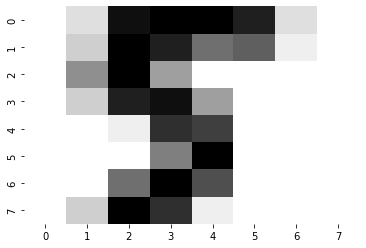

In [8]:
print(f"Predicted number: {y_pred[0]}")
sns.heatmap(np.array(df.loc[y_test.index[0], 0:63]).reshape(8, 8), cbar=False, cmap='gray_r')

**Conclusion:**
a regression logistic with every "pixel" as a variable had a good performance since it classified correclty the numbers 1 and 5 most of the times. This approach, however may not be applicable to most of the cenarios, since a high definitive image with a high quantity of variable increse exponentially the complexity of the model.

### Approach 2: aggregated intensity and simmetry

In a more "efficient" approach, only 3 features will be used:
1. image index
2. average intensity of color
3. average symmetry

In [9]:
def image_decomposition(data):
    """
    Obtain 3 features from an 8x8 matrix: location, intensity and symmetry. 
    """
    index_list = list(range(len(data1)))
    intensity_list = []
    symmetry_list = []
    df = pd.DataFrame()
    for i in data:

        # Generating a custom intensity feature
        intensity_list.append(i.sum())

        # Generating a custom symmetry feature: 
        symmetry_v = abs(i - np.flip(i, 0)).sum()
        symmetry_h = abs(i - np.flip(i, 1)).sum()
        symmetry_list.append(symmetry_v + symmetry_h)

    df = pd.DataFrame({'index':index_list, 'intensity':intensity_list, 'anti symmetry':symmetry_list})
    return df

In [10]:
df1 = image_decomposition(image1)
df1['target'] = 1

df5 = image_decomposition(image5)
df5['target'] = 5

df = pd.concat([df1, df5], axis=0, ignore_index=True)
df.sample(5)

,index,intensity,anti symmetry,target
205,23,310.0,464.0,5
324,142,297.0,648.0,5
325,143,286.0,504.0,5
34,34,280.0,452.0,1
31,31,326.0,420.0,1


<AxesSubplot:xlabel='intensity', ylabel='anti symmetry'>

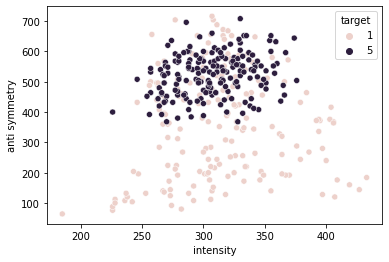

In [11]:
sns.scatterplot(data=df, x='intensity', y='anti symmetry', hue='target')
#plt.ylim(reversed(plt.ylim()))

In [12]:
X = df.drop(columns='target')
y = df['target']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Predicting and measuring the accuracy.
model = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

(364, 3) (364,)
(291, 3) (73, 3) (291,) (73,)
0.6164383561643836
[[20 17]
 [11 25]]


**Conclusion:**
the model underperformed considerably when comparing with the previous approach, although the model became simpler. It is arguable that the perfomance was offset by the aggregation method, as the plot above shows the variables used were not relevant. Since the dataset in this notebook is not the same used in the lectures, diverging results are expected.

## Linear Regression: credit problem

**Objective:**
demonstrate the calculations of a matrix calculations of linear regression.

<img src="img/linear-regression-matrix.PNG" />

In [69]:
# Creating the dummy dataset with bias.
X, y, coef = make_regression(n_samples=10, n_features=3, n_informative=3, bias=1, coef=True, random_state=52)
print(coef)

df = pd.DataFrame(data=X, columns=['x1', 'x2', 'x3'])
df['y'] = y
df

[ 7.87490733 48.7645258  43.43886449]


,x1,x2,x3,y
0,1.279132,0.659736,-0.455381,23.463551
1,-0.484149,1.319828,1.445540,124.340762
2,1.239795,0.560636,-0.542817,14.523060
3,0.216783,0.507742,0.973072,69.736110
4,0.519476,-1.268750,0.240420,-46.335614
5,1.465789,-0.418927,1.466306,55.808853
6,0.051817,1.628679,-0.366000,64.931201
7,-0.356642,-0.788295,-0.232578,-50.352245
8,-0.803957,0.017344,0.394394,12.646707
9,-0.847501,-1.748253,0.808072,-55.824990


In [70]:
# Checking the variables and coefficient.
y_pred = df.loc[0, 'x1'] * coef[0] + df.loc[0, 'x2'] * coef[1] + df.loc[0, 'x3'] * coef[2]
y_pred

22.463551327079134

`y` and `y_pred` are close, and the small difference is because of the bias argument inserted during the creating of the dataset.

In [64]:
print(X.shape)
X

(10, 3)


array([[ 1.27913226,  0.65973637, -0.45538088],
       [-0.48414947,  1.31982782,  1.44554   ],
       [ 1.23979542,  0.56063586, -0.54281703],
       [ 0.21678252,  0.50774249,  0.97307206],
       [ 0.51947584, -1.26875038,  0.24042003],
       [ 1.46578903, -0.41892673,  1.4663059 ],
       [ 0.05181732,  1.62867942, -0.36600024],
       [-0.35664161, -0.78829462, -0.23257772],
       [-0.80395743,  0.0173441 ,  0.39439383],
       [-0.84750125, -1.74825258,  0.80807157]])

In [65]:
print(X.T.shape)
X.T

(3, 10)


array([[ 1.27913226, -0.48414947,  1.23979542,  0.21678252,  0.51947584,
         1.46578903,  0.05181732, -0.35664161, -0.80395743, -0.84750125],
       [ 0.65973637,  1.31982782,  0.56063586,  0.50774249, -1.26875038,
        -0.41892673,  1.62867942, -0.78829462,  0.0173441 , -1.74825258],
       [-0.45538088,  1.44554   , -0.54281703,  0.97307206,  0.24042003,
         1.4663059 , -0.36600024, -0.23257772,  0.39439383,  0.80807157]])

In [66]:
X_dagger = np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T)
print(X_dagger.shape)
X_dagger

(3, 10)


array([[ 0.16375865, -0.08572008,  0.1596996 ,  0.0259435 ,  0.09932746,
         0.2222812 , -0.02703341, -0.0357692 , -0.11084718, -0.0796728 ],
       [ 0.03245811,  0.15383088,  0.02266143,  0.05629285, -0.12907688,
        -0.05130472,  0.15078493, -0.07141972,  0.02236839, -0.14113609],
       [-0.05309431,  0.23065309, -0.06767394,  0.15373466,  0.02365878,
         0.22375533, -0.03487834, -0.04662159,  0.05490161,  0.09532675]])

In [67]:
# The coefficients resulted from the matrix calculations.
w = np.matmul(X_dagger, y)
print(w.shape)
w

(3,)


array([ 8.20687507, 48.80998499, 44.01862652])

In [68]:
# The real coefficients used when creating the dataset.
coef

array([ 7.87490733, 48.7645258 , 43.43886449])

**Conclusion:**
the matrix calculations were able to estimate the coefficients based on the variables and the target. Since the dummy datset were created with bias, the estimate was not perfect, although it minimized the erros between prediction and target.